In [2]:
import os 
import re
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import numpy as np

import pandas as pd
from src.astroML.datasets.tools.download import download_with_progress_bar

import astroquery
from astroquery.sdss import SDSS
from astropy.table import Table
from astropy.io import fits

import specutils
from specutils import Spectrum1D

from matplotlib import pyplot as plt


In [4]:
nonbal_qso_samp_path = '../data/nonbal_qso_samp.csv'
nonbal_qso_samp_df = pd.read_csv(nonbal_qso_samp_path, index_col=0)

In [5]:
hdul = SDSS.get_spectra(plate = nonbal_qso_samp_df.iloc[[0]].PLATE,
                        mjd = nonbal_qso_samp_df.iloc[[0]].MJD,
                        fiberID = nonbal_qso_samp_df.iloc[[0]].FIBERID, 
                        data_release=16)

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astroquery/sdss/core.py:1038: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  s_fields = ['s.%s=%d' % (key, val) for (key, val) in
/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [13]:
c0 = hdul[0][0].header['COEFF0']
c1 = hdul[0][0].header['COEFF1']
npix = hdul[0][0].header['naxis1']
wave = 10.**(c0 + c1 * n.arange(npix))

KeyError: "Keyword 'NAXIS1' not found."

In [14]:
hdul[0][0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'SDSS 2.5-M'         / Sloan Digital Sky Survey                       
FLAVOR  = 'science '           / exposure type, SDSS spectro style              
BOSSVER = '2       '           / ICC version                                    
MJD     =                55629 / APO fMJD day at start of exposure              
MJDLIST = '55626 55627 55629'  /                                                
NAME    = '4622-55624-01'      / The name of the currently loaded plate         
PLATEID =                 4622 / The currently loaded plate                     
TILEID  =                11799 /Cartridge used in this plugging                 
CARTID  =                   

In [12]:
spec = Spectrum1D.read(hdul[0], format="SDSS-III/IV spec")

In [13]:
spec

<Spectrum1D(flux=<Quantity [ 1.3906467e+01,  4.8436441e+00, -4.2167773e+00, ...,
            1.1841333e+00, -4.5755021e-03,  1.9057959e+00] 1e-17 erg / (Angstrom s cm2)>, spectral_axis=<SpectralAxis [ 3549.768 ,  3550.5847,  3551.4036, ..., 10322.862 , 10325.231 ,
   10327.612 ] Angstrom>, uncertainty=InverseVariance([0.00538432, 0.        , 0.02030968, ..., 0.26759455,
                 0.2625426 , 0.22928058]))>

In [14]:
spec.uncertainty

InverseVariance([0.00538432, 0.        , 0.02030968, ..., 0.26759455,
                 0.2625426 , 0.22928058])

In [17]:
spec.wavelength

<SpectralAxis [ 3549.768 ,  3550.5847,  3551.4036, ..., 10322.862 , 10325.231 ,
   10327.612 ] Angstrom>

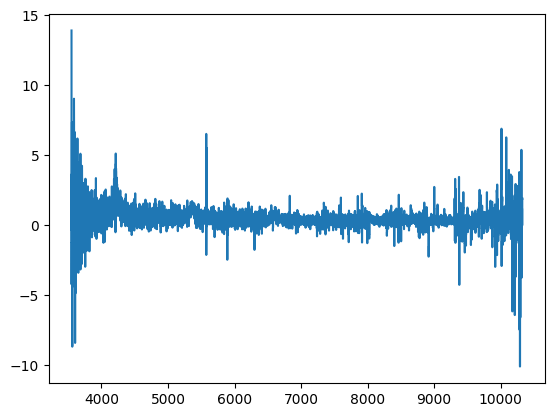

In [19]:
f, ax = plt.subplots()  
ax.step(spec.spectral_axis, spec.flux) 